**Importing necessary libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import datetime
import warnings
import os

warnings.filterwarnings('ignore', category=UserWarning) # Supressing warnings

**Loading the data into a dataframe**

In [41]:
# def getLatestCSV():
#     return 'Latest Report'

df = pd.read_csv('Reports//Nov_18_2023.csv')

display(df)

,time,localTime,batteryPercent,charging,connected,bytesSent,bytesReceived,runningProc,memUsageMB,hungriestProc,hungryProcMem
0,1700318044,04:34 PM,99,Yes,Yes,4541307,261440419,113,9124.10,Code.exe,1947.69
1,1700318104,04:35 PM,99,Yes,Yes,4544265,261472998,112,9098.64,Code.exe,1935.34
2,1700318165,04:36 PM,99,Yes,Yes,4550271,261509030,112,9101.78,Code.exe,1940.07
3,1700318225,04:37 PM,99,Yes,Yes,4885710,265124895,113,9552.92,Code.exe,1930.02
4,1700318286,04:38 PM,99,Yes,Yes,4893722,265163068,111,9412.88,Code.exe,1922.32
...,...,...,...,...,...,...,...,...,...,...,...
140,1700328456,07:27 PM,42,No,Yes,5701795,52035599,112,12037.84,Code.exe,2044.45
141,1700328517,07:28 PM,41,No,Yes,5880208,52770687,112,12069.42,Code.exe,2030.36
142,1700328578,07:29 PM,41,No,Yes,6031734,53215529,112,12044.70,Code.exe,2048.29
143,1700328639,07:30 PM,40,No,Yes,6076025,53280207,112,12080.91,Code.exe,2078.80


**Processing the data**

In [42]:
df = df.drop(columns=['localTime', 'connected', 'hungriestProc', 'hungryProcMem']) 

display(df)

,time,batteryPercent,charging,bytesSent,bytesReceived,runningProc,memUsageMB
0,1700318044,99,Yes,4541307,261440419,113,9124.10
1,1700318104,99,Yes,4544265,261472998,112,9098.64
2,1700318165,99,Yes,4550271,261509030,112,9101.78
3,1700318225,99,Yes,4885710,265124895,113,9552.92
4,1700318286,99,Yes,4893722,265163068,111,9412.88
...,...,...,...,...,...,...,...
140,1700328456,42,No,5701795,52035599,112,12037.84
141,1700328517,41,No,5880208,52770687,112,12069.42
142,1700328578,41,No,6031734,53215529,112,12044.70
143,1700328639,40,No,6076025,53280207,112,12080.91


**One-hot encoding the 'charging' column**

In [43]:
encoder = OneHotEncoder(handle_unknown='ignore') 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['charging']]).toarray())

df = pd.concat([df, encoder_df], axis=1) # Concatenating the encoded dataframe with the original dataframe
df = df.drop(columns=['charging']) # Dropping the original column
df.columns = ['timestamp', 'batteryPercent', 'bytesSent', 'bytesReceived', 'runningProc', 'memUsageMB', 'not_charging', 'charging'] # Renaming the columns
df = df.drop(columns = ['not_charging']) # Dropping the 'not_charging' column



df = df[df['charging'] == 0.0] # Dropping the rows where 'charging' is not equal to 0.0

display(df)

,timestamp,batteryPercent,bytesSent,bytesReceived,runningProc,memUsageMB,charging
19,1700319195,100,5412313,266245195,113,10008.40,0.0
20,1700319256,100,5415787,266275666,113,9987.30,0.0
21,1700319317,100,5429094,266370700,113,9988.03,0.0
22,1700319378,100,5441414,266432406,114,9935.16,0.0
45,1700320779,100,7066386,283455690,113,11091.84,0.0
...,...,...,...,...,...,...,...
139,1700328395,42,5681254,51995699,112,12038.63,0.0
140,1700328456,42,5701795,52035599,112,12037.84,0.0
141,1700328517,41,5880208,52770687,112,12069.42,0.0
142,1700328578,41,6031734,53215529,112,12044.70,0.0


In [44]:
df = df.drop(['charging'], axis=1) # Dropping the 'charging' column

display(df)

,timestamp,batteryPercent,bytesSent,bytesReceived,runningProc,memUsageMB
19,1700319195,100,5412313,266245195,113,10008.40
20,1700319256,100,5415787,266275666,113,9987.30
21,1700319317,100,5429094,266370700,113,9988.03
22,1700319378,100,5441414,266432406,114,9935.16
45,1700320779,100,7066386,283455690,113,11091.84
...,...,...,...,...,...,...
139,1700328395,42,5681254,51995699,112,12038.63
140,1700328456,42,5701795,52035599,112,12037.84
141,1700328517,41,5880208,52770687,112,12069.42
142,1700328578,41,6031734,53215529,112,12044.70


**Splitting the data into a training set and a testing set**

In [45]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Training Dataset:\n")
display(train_df)

print("----------------------------------------------------------------------------------------")
print("Testing Dataset:\n")
display(test_df)

Training Dataset:



,timestamp,batteryPercent,bytesSent,bytesReceived,runningProc,memUsageMB
94,1700325300,67,4290248,41002659,111,11147.55
63,1700323412,83,332269,1657875,113,11537.26
109,1700326213,60,4668658,41787806,112,11023.84
85,1700324753,71,4036239,40344578,106,10856.41
139,1700328395,42,5681254,51995699,112,12038.63
...,...,...,...,...,...,...
112,1700326395,58,4725035,42207337,111,10981.55
55,1700322926,86,258442,1288600,114,11573.12
133,1700327677,48,5179202,43789727,110,11050.42
92,1700325179,68,4263820,40896871,110,11271.34


----------------------------------------------------------------------------------------
Testing Dataset:



,timestamp,batteryPercent,bytesSent,bytesReceived,runningProc,memUsageMB
71,1700323900,79,756173,3548021,113,11818.46
108,1700326152,60,4612420,41696550,112,11091.47
103,1700325848,63,4361515,41345945,110,10930.19
88,1700324935,70,4179082,40742567,112,11225.63
83,1700324631,72,4026486,40293321,111,11509.86
81,1700324509,73,3912112,40163183,115,13402.55
131,1700327555,49,5168091,43717870,110,11071.43
86,1700324814,71,4048672,40399922,106,10861.32
51,1700322683,88,236867,1159966,115,11606.19
19,1700319195,100,5412313,266245195,113,10008.40


**Preparing the training and testing data**

In [46]:
train_X = train_df.drop('batteryPercent', axis=1)
train_y = train_df['batteryPercent']

test_X = test_df.drop('batteryPercent', axis=1)
test_y = test_df['batteryPercent']

print('train_X:\n')
display(train_X)
print("----------------------------------------------------------------------------------------")

print('train_y:\n')
display(train_y)
print("----------------------------------------------------------------------------------------")

print('test_X:\n')
display(test_X)
print("----------------------------------------------------------------------------------------")

print('test_y:\n')
display(test_y)

train_X:



,timestamp,bytesSent,bytesReceived,runningProc,memUsageMB
94,1700325300,4290248,41002659,111,11147.55
63,1700323412,332269,1657875,113,11537.26
109,1700326213,4668658,41787806,112,11023.84
85,1700324753,4036239,40344578,106,10856.41
139,1700328395,5681254,51995699,112,12038.63
...,...,...,...,...,...
112,1700326395,4725035,42207337,111,10981.55
55,1700322926,258442,1288600,114,11573.12
133,1700327677,5179202,43789727,110,11050.42
92,1700325179,4263820,40896871,110,11271.34


----------------------------------------------------------------------------------------
train_y:



94     67
63     83
109    60
85     71
139    42
       ..
112    58
55     86
133    48
92     68
143    40
Name: batteryPercent, Length: 82, dtype: int64

----------------------------------------------------------------------------------------
test_X:



,timestamp,bytesSent,bytesReceived,runningProc,memUsageMB
71,1700323900,756173,3548021,113,11818.46
108,1700326152,4612420,41696550,112,11091.47
103,1700325848,4361515,41345945,110,10930.19
88,1700324935,4179082,40742567,112,11225.63
83,1700324631,4026486,40293321,111,11509.86
81,1700324509,3912112,40163183,115,13402.55
131,1700327555,5168091,43717870,110,11071.43
86,1700324814,4048672,40399922,106,10861.32
51,1700322683,236867,1159966,115,11606.19
19,1700319195,5412313,266245195,113,10008.40


----------------------------------------------------------------------------------------
test_y:



71      79
108     60
103     63
88      70
83      72
81      73
131     49
86      71
51      88
19     100
59      84
72      78
138     43
126     51
117     56
45     100
120     54
74      77
53      87
67      81
141     41
Name: batteryPercent, dtype: int64

**Creating and training the linear regression model**

In [47]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

**Making predictions on the testing set**

In [48]:
predictions = model.predict(test_X)
print(predictions)

[ 78.99241216  59.17282344  62.28401531  68.76525172  72.11053277
  74.33507878  49.30612929  72.09617828  87.04878048 105.03083719
  84.28154729  79.36059835  43.68327808  51.51901087  54.66543904
  94.03239007  54.20371445  77.31478919  86.5741508   80.52931268
  42.34375676]


**Evaluating the model using Mean Squared Error (MSE)**

In [49]:
mse = mean_squared_error(test_y, predictions)
print(f'MSE: {mse:.2f}')

MSE: 3.54


**Visualizing the results**

,timestamp,bytesSent,bytesReceived,runningProc,memUsageMB
0,1.700319e+09,3.565391e+06,5.348806e+07,112.285714,11559.625238
0,1.700319e+09,3.565391e+06,5.348806e+07,112.285714,11559.625238
0,1.700319e+09,3.565391e+06,5.348806e+07,112.285714,11559.625238
0,1.700319e+09,3.565391e+06,5.348806e+07,112.285714,11559.625238
0,1.700320e+09,3.565391e+06,5.348806e+07,112.285714,11559.625238
...,...,...,...,...,...
0,1.700328e+09,3.565391e+06,5.348806e+07,112.285714,11559.625238
0,1.700328e+09,3.565391e+06,5.348806e+07,112.285714,11559.625238
0,1.700328e+09,3.565391e+06,5.348806e+07,112.285714,11559.625238
0,1.700328e+09,3.565391e+06,5.348806e+07,112.285714,11559.625238


[112.53135148 111.82032292 111.10929435 110.39826579 109.68723723
 108.97620866 108.26518009 107.55415153 106.84312296 106.1320944
 105.42106584 104.71003727 103.99900871 103.28798014 102.57695158
 101.86592301 101.15489445 100.44386588  99.73283732  99.02180875
  98.31078019  97.59975162  96.88872305  96.17769449  95.46666593
  94.75563736  94.0446088   93.33358023  92.62255167  91.9115231
  91.20049454  90.48946597  89.77843741  89.06740884  88.35638028
  87.64535171  86.93432315  86.22329458  85.51226602  84.80123745
  84.09020889  83.37918032  82.66815176  81.95712319  81.24609463
  80.53506606  79.8240375   79.11300893  78.40198037  77.6909518
  76.97992324  76.26889467  75.55786611  74.84683754  74.13580898
  73.42478041  72.71375185  72.00272328  71.29169472  70.58066615
  69.86963759  69.15860902  68.44758046  67.73655189  67.02552333
  66.31449476  65.6034662   64.89243763  64.18140907  63.4703805
  62.75935194  62.04832337  61.33729481  60.62626624  59.91523768
  59.20420911 

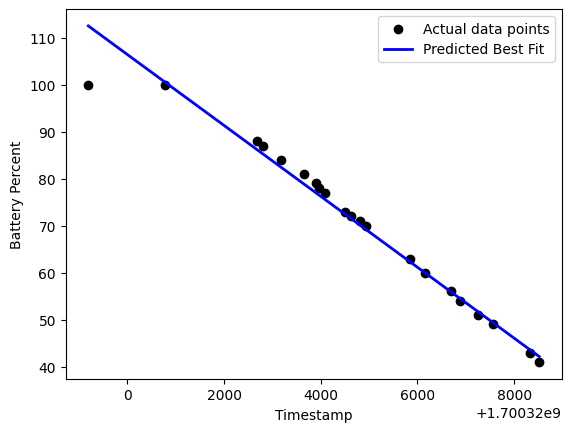

In [50]:
# Plotting the actual data points
plt.scatter(test_X['timestamp'], test_y, color="black", label='Actual data points')

# We need to calculate the best-fit line
# For a multiple regression model, this is done by generating predictions across the range of timestamps
# We first need to create a DataFrame with the mean values for all features except 'timestamp'
feature_means = test_X.mean()
timestamps_range = np.linspace(test_X['timestamp'].min(), test_X['timestamp'].max(), num=100) 

# Now we create a DataFrame with these timestamps and other features set to their mean values
best_fit_df = pd.DataFrame(feature_means).transpose().reindex([0]*100)
best_fit_df['timestamp'] = timestamps_range

display(best_fit_df)

# Making predictions with the new DataFrame
best_fit_line = model.predict(best_fit_df)
print(best_fit_line)

# Plotting the best-fit line
plt.plot(timestamps_range, best_fit_line, color="blue", linewidth=2, label='Predicted Best Fit')

plt.xlabel('Timestamp')
plt.ylabel('Battery Percent')
plt.legend()
plt.show()

**Predicting the time when the battery will fall below a certain threshold**

In [51]:
def predict_battery_depletion_duration(model, initial_data, threshold=20):
    current_data = initial_data.copy()
    current_time = current_data['timestamp'].max()  # Getting the latest timestamp in the data

    while True:
        last_row = current_data.iloc[-1].drop('batteryPercent')
        predicted_battery = model.predict(last_row.to_numpy().reshape(1, -1))[0]

        if predicted_battery < threshold:
            break  # Exit the loop when battery threshold is reached

        # Increment the time for the next prediction
        current_time += 60 # 60 seconds
        new_row = current_data.iloc[-1].copy()
        new_row['timestamp'] = current_time
        current_data = pd.concat([current_data, pd.DataFrame([new_row])], ignore_index=True)

    # Calculate the duration until the battery depletes
    final_time = current_data['timestamp'].max()
    remaining_time_seconds = final_time - initial_data['timestamp'].max()  # Difference from current time
    remaining_time = datetime.timedelta(seconds=remaining_time_seconds)

    return remaining_time

**Using the function to predict remaining battery time**

In [52]:
remaining_time = predict_battery_depletion_duration(model, df)
print(f'Remaining battery time: {remaining_time}')

Remaining battery time: 0:48:00
